# collect data

## prepare movies name list
for data balance, prepare the same number of positive and negative data

In [1]:
import requests
from bs4 import BeautifulSoup

def get_movie_names(url):

    # Add headers to simulate a browser visit
    headers = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'
    }

    # Send a GET request to the URL
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the content of the page with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        movie_hrefs = []
        movie_elements = soup.find_all('div', class_='flex-container')
        for item in movie_elements:
            a_tag = item.find('a', {'data-qa': 'discovery-media-list-item-caption'})

            # Get the href attribute from the <a> tag
            href_value = a_tag['href'] if a_tag else ''
            movie_hrefs.append(href_value) if href_value else None

        # print(movie_hrefs)
        return movie_hrefs
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [2]:
positive_url = 'https://www.rottentomatoes.com/browse/movies_at_home/critics:fresh~sort:popular?page=3'
positive_movies = get_movie_names(positive_url)
positive_movies[:5]

['/m/juror_2',
 '/m/conclave',
 '/m/the_substance',
 '/m/that_christmas',
 '/m/heretic_2024']

In [3]:
print('number of positive movies:', len(positive_movies))

number of positive movies: 80


In [4]:
negative_url = 'https://www.rottentomatoes.com/browse/movies_at_home/critics:rotten~sort:popular?page=3'
negative_movies = get_movie_names(negative_url)
negative_movies[:5]

['/m/red_one',
 '/m/dear_santa_2024',
 '/m/nutcrackers',
 '/m/our_little_secret',
 '/m/it_ends_with_us']

In [5]:
print('number of negative movies:', len(negative_movies))

number of negative movies: 69


In [6]:
import random

userAgent = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.67 Safari/537.36 Edg/87.0.664.55',
    'Mozilla/5.0 (iPhone; CPU iPhone OS 14_0_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 SP-engine/2.25.0 main%2F1.0 baiduboxapp/12.4.0.13 (Baidu; P2 14.0.1) NABar/1.0',
    'Mozilla/5.0 (Linux; Android 10; CDY-TN00 Build/HUAWEICDY-TN00; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/78.0.3904.108 Mobile Safari/537.36',
    'Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D)',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_0_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36',
    'Mozilla/5.0 (iPhone; CPU iPhone OS 12_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 SP-engine/2.25.0 main%2F1.0 baiduboxapp/12.3.0.10 (Baidu; P2 12.3.1) NABar/1.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
]

# Create headers (random choose userAgent)
def create_headers():
    ua = random.choice(userAgent)
    headers = {
        'User-Agent': ua
    }
    return headers

In [7]:
hd = create_headers()
hd

{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36'}

In [10]:
from pyquery import PyQuery as pq
import pandas as pd

# for each movie, get 20 reviews and store them in a dataframe
def get_reviews(movie):
    url = 'https://www.rottentomatoes.com{}/reviews'.format(movie)
    print('url: ', url)
    
    headers = create_headers()
    html = requests.request('GET', url, headers=headers)
    html.encoding='utf-8'
    doc = pq(html.text)

    reviews = {
        'name': [],
        'source': [],
        'text': [],
        'date': []
    }

    for num in range(1, 21):
        name_ = '#reviews > div.review_table > div:nth-child({}) > div.review-data > div > a.display-name'.format(num)
        name = doc(name_).text()
        source_ = '#reviews > div.review_table > div:nth-child({}) > div.review-data > div > a.publication'.format(num)
        source = doc(source_).text()
        text_ = '#reviews > div.review_table > div:nth-child({}) > div.review-text-container > p.review-text'.format(num)
        text = doc(text_).text()
        date_ = '#reviews > div.review_table > div:nth-child({}) > div.review-text-container > p.original-score-and-url > span'.format(num)
        date = doc(date_).text()
        
        reviews['name'].append(name)
        reviews['source'].append(source)
        reviews['text'].append(text)
        reviews['date'].append(date)

    reviews_df = pd.DataFrame(reviews)
    return reviews_df

In [11]:
test = get_reviews(positive_movies[0])
test

url:  https://www.rottentomatoes.com/m/juror_2/reviews


,name,source,text,date
0,Yasser Medina,Cinefilia,Eastwood not only delivers one of his best fil...,"Dec 8, 2024"
1,Keith Garlington,Keith & the Movies,"Its themes are potent, the stakes get higher, ...","Dec 5, 2024"
2,Marie Asner,Phantom Tollbooth,The film is a study in tension.,"Dec 3, 2024"
3,Casey Chong,Casey's Movie Mania,Nicholas Hoult leads Clint Eastwood's engrossi...,"Dec 3, 2024"
4,Frank Swietek,One Guy's Opinion,[A] contrived if provocative script is saved f...,"Dec 1, 2024"
5,David Nusair,Reel Film Reviews,Juror #2‘s overall impact is hampered by Eastw...,"Dec 1, 2024"
6,Reginald Ponder,The Garfield/Lawndale Voice,While “Juror #2” reminds us that everything is...,"Nov 29, 2024"
7,Austin Burke,Austin Burke/Flick Fan Nation,Juror #2 is the best Eastwood film in years. I...,"Nov 28, 2024"
8,Sheraz Farooqi,CinemaDebate,Clint Eastwood's directs a strong film on inne...,"Nov 27, 2024"
9,Ruth Maramis,FlixChatter Film Blog,Clint Eastwood’s engrossing courtroom drama ha...,"Nov 26, 2024"


In [12]:
import time

# for given movie list, get all reviews
def get_reviews_df(movies, num=60):
    reviews_df = pd.DataFrame()
    for movie in movies[:num]:
        df = get_reviews(movie)
        time.sleep(1)
        reviews_df = pd.concat([reviews_df, df], ignore_index=True)
    
    return reviews_df

In [13]:
# get positive movie's reviews
pos_reviews_df = get_reviews_df(positive_movies)
pos_reviews_df['rating'] = 'fresh'
pos_reviews_df

url:  https://www.rottentomatoes.com/m/juror_2/reviews
url:  https://www.rottentomatoes.com/m/conclave/reviews
url:  https://www.rottentomatoes.com/m/the_substance/reviews
url:  https://www.rottentomatoes.com/m/that_christmas/reviews
url:  https://www.rottentomatoes.com/m/heretic_2024/reviews
url:  https://www.rottentomatoes.com/m/smile_2/reviews
url:  https://www.rottentomatoes.com/m/fly_me_to_the_moon_2024/reviews
url:  https://www.rottentomatoes.com/m/the_best_christmas_pageant_ever_2024/reviews
url:  https://www.rottentomatoes.com/m/the_wild_robot/reviews
url:  https://www.rottentomatoes.com/m/hot_frosty/reviews
url:  https://www.rottentomatoes.com/m/beetlejuice_beetlejuice/reviews
url:  https://www.rottentomatoes.com/m/emilia_perez/reviews
url:  https://www.rottentomatoes.com/m/christmas_eve_in_millers_point/reviews
url:  https://www.rottentomatoes.com/m/speak_no_evil_2024/reviews
url:  https://www.rottentomatoes.com/m/blitz/reviews
url:  https://www.rottentomatoes.com/m/alien_rom

,name,source,text,date,rating
0,Yasser Medina,Cinefilia,Eastwood not only delivers one of his best fil...,"Dec 8, 2024",fresh
1,Keith Garlington,Keith & the Movies,"Its themes are potent, the stakes get higher, ...","Dec 5, 2024",fresh
2,Marie Asner,Phantom Tollbooth,The film is a study in tension.,"Dec 3, 2024",fresh
3,Casey Chong,Casey's Movie Mania,Nicholas Hoult leads Clint Eastwood's engrossi...,"Dec 3, 2024",fresh
4,Frank Swietek,One Guy's Opinion,[A] contrived if provocative script is saved f...,"Dec 1, 2024",fresh
...,...,...,...,...,...
1195,Andiee Paviour,Nobody's Reading This But Me,An addictive TV show redefines reality for two...,"Aug 29, 2024",fresh
1196,Cain Noble-Davies,FILMINK (Australia),"It is beautiful, it is terrifying, it is reass...","Aug 16, 2024",fresh
1197,Alistair Harkness,Scotsman,Jane Schoenbrun’s sophomore feature I Saw the ...,"Aug 9, 2024",fresh
1198,Cody Leach,Cody Leach (YouTube),There are some very creative and bold choices ...,"Aug 9, 2024",fresh


In [14]:
# get negative movie's reviews
neg_reviews_df = get_reviews_df(negative_movies)
neg_reviews_df['rating'] = 'rotten'
neg_reviews_df

url:  https://www.rottentomatoes.com/m/red_one/reviews
url:  https://www.rottentomatoes.com/m/dear_santa_2024/reviews
url:  https://www.rottentomatoes.com/m/nutcrackers/reviews
url:  https://www.rottentomatoes.com/m/our_little_secret/reviews
url:  https://www.rottentomatoes.com/m/it_ends_with_us/reviews
url:  https://www.rottentomatoes.com/m/elevation/reviews
url:  https://www.rottentomatoes.com/m/venom_the_last_dance/reviews
url:  https://www.rottentomatoes.com/m/joker_folie_a_deux/reviews
url:  https://www.rottentomatoes.com/m/afraid_2024/reviews
url:  https://www.rottentomatoes.com/m/here_2024/reviews
url:  https://www.rottentomatoes.com/m/midway_2019/reviews
url:  https://www.rottentomatoes.com/m/megalopolis/reviews
url:  https://www.rottentomatoes.com/m/trap_2024/reviews
url:  https://www.rottentomatoes.com/m/weekend_in_taipei/reviews
url:  https://www.rottentomatoes.com/m/spellbound_2024/reviews
url:  https://www.rottentomatoes.com/m/the_merry_gentlemen/reviews
url:  https://www.

,name,source,text,date,rating
0,Lael Loewenstein,FilmWeek (KPCC - NPR Los Angeles),"It's worth hanging in there, because [Chris Ev...","Dec 4, 2024",rotten
1,Manuel Betancourt,FilmWeek (KPCC - NPR Los Angeles),It knows what it's doing. I don't know if it's...,"Dec 4, 2024",rotten
2,Sarah Marrs,Lainey Gossip,Red One is incredibly bland.,"Nov 29, 2024",rotten
3,Austin Burke,Austin Burke/Flick Fan Nation,"While not as egregious as its initial trailer,...","Nov 28, 2024",rotten
4,KT Mahe,For Your Reference Podcast,Red One may be wrapped differently but brings ...,"Nov 26, 2024",rotten
...,...,...,...,...,...
1195,Andrew Galdi,Movie Bitches,This movie is dark.,"May 18, 2020",rotten
1196,Avaryl Halley,Movie Bitches,I really liked this movie.,"May 18, 2020",rotten
1197,Dan Scully,Cinema76,"Red Sparrow is a dense, thoroughly adult espio...","Mar 20, 2020",rotten
1198,J. R. Jones,Chicago Reader,Director Francis Lawrence... seems to have rea...,"Mar 9, 2020",rotten


# Combine the data

In [15]:
merge_df = pd.concat([pos_reviews_df, neg_reviews_df], ignore_index=True)
merge_df

,name,source,text,date,rating
0,Yasser Medina,Cinefilia,Eastwood not only delivers one of his best fil...,"Dec 8, 2024",fresh
1,Keith Garlington,Keith & the Movies,"Its themes are potent, the stakes get higher, ...","Dec 5, 2024",fresh
2,Marie Asner,Phantom Tollbooth,The film is a study in tension.,"Dec 3, 2024",fresh
3,Casey Chong,Casey's Movie Mania,Nicholas Hoult leads Clint Eastwood's engrossi...,"Dec 3, 2024",fresh
4,Frank Swietek,One Guy's Opinion,[A] contrived if provocative script is saved f...,"Dec 1, 2024",fresh
...,...,...,...,...,...
2395,Andrew Galdi,Movie Bitches,This movie is dark.,"May 18, 2020",rotten
2396,Avaryl Halley,Movie Bitches,I really liked this movie.,"May 18, 2020",rotten
2397,Dan Scully,Cinema76,"Red Sparrow is a dense, thoroughly adult espio...","Mar 20, 2020",rotten
2398,J. R. Jones,Chicago Reader,Director Francis Lawrence... seems to have rea...,"Mar 9, 2020",rotten


In [16]:
# shuffle here
final_df = merge_df.sample(frac=1)
final_df

,name,source,text,date,rating
501,Alyse Wax,Screenopolis,Terrifier 3 does not disappoint. It is bloody ...,"Nov 27, 2024",fresh
951,Diego Batlle,Otroscines.com,Not only is it a beautiful human portrait full...,"Oct 7, 2024",fresh
1502,Liz Kocan,Decider,The Merry Gentlemen offers mild titillation th...,"Dec 4, 2024",rotten
1068,Jamie Graham,Total Film,"In a strong year for indie horror movies, this...","Sep 23, 2024",fresh
899,Austin Burke,Austin Burke/Flick Fan Nation,"There is often beauty in simplicity, and that ...","Oct 28, 2024",fresh
...,...,...,...,...,...
1070,Emilie Black,Cinema Crazed,"Oddity is one of the best, if not THE best, sc...","Sep 14, 2024",fresh
473,Vera Wylde,Council of Geeks,It was fun (but) it's too long. I felt like I ...,"Sep 23, 2024",fresh
1739,J. R. Jones,Chicago Reader,"This is marginally better than most, with a fe...","Dec 9, 2008",rotten
2057,Thomas Peyser,"Style Weekly (Richmond, VA)","With the release of this wretched film, star B...","Nov 5, 2004",rotten


### Save data to Database(SQLite)

In [17]:
import sqlite3

# Create connection to SQLite database
conn = sqlite3.connect('movie_reviews.db')

# Save dataframes to SQLite
pos_reviews_df.to_sql('positive_reviews', conn, if_exists='replace', index=False)
neg_reviews_df.to_sql('negative_reviews', conn, if_exists='replace', index=False)
final_df.to_sql('final_reviews', conn, if_exists='replace', index=False)

# Close connection
conn.close()

### check data

In [18]:
import sqlite3

# Connect SQLite DB
db_path = 'movie_reviews.db'
conn = sqlite3.connect(db_path)

# Create cursor
cursor = conn.cursor()

# Check all tables
print("tables in db")
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(f"- {table[0]}")

tables in db
- positive_reviews
- negative_reviews
- final_reviews


In [19]:
# Iterate over all tables, displaying the first 5 entries of each table
for table in tables:
    table_name = table[0]
    print(f"\nTable '{table_name}' first 5 entities：")
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
    rows = cursor.fetchall()

    if rows:
        for row in rows:
            print(row)
    else:
        print("(No data)")

# Close connection
conn.close()


Table 'positive_reviews' first 5 entities：
('Yasser Medina', 'Cinefilia', 'Eastwood not only delivers one of his best films in more than two decades, but also a legal thriller that maintains its tense pulse to build its sharp discourse on ethics, truth and the fragility of justice. [Full review in Spanish]', 'Dec 8, 2024', 'fresh')
('Keith Garlington', 'Keith & the Movies', 'Its themes are potent, the stakes get higher, and actions have far-reaching consequences. At the same time it entertains like an old-fashioned, well-oiled genre film. If this is Eastwood’s final film…what a way to wrap a truly remarkable career.', 'Dec 5, 2024', 'fresh')
('Marie Asner', 'Phantom Tollbooth', 'The film is a study in tension.', 'Dec 3, 2024', 'fresh')
('Casey Chong', "Casey's Movie Mania", "Nicholas Hoult leads Clint Eastwood's engrossing legal thriller.", 'Dec 3, 2024', 'fresh')
('Frank Swietek', "One Guy's Opinion", '[A] contrived if provocative script is saved from a fatal case of implausibility b

### Load data from Database(SQLite)

In [20]:
# Create connection to SQLite database
conn = sqlite3.connect('movie_reviews.db')

# Load final_df from SQLite
final_df = pd.read_sql_query("SELECT * FROM final_reviews", conn)

# Close connection
conn.close()

In [21]:
final_df

,name,source,text,date,rating
0,Alyse Wax,Screenopolis,Terrifier 3 does not disappoint. It is bloody ...,"Nov 27, 2024",fresh
1,Diego Batlle,Otroscines.com,Not only is it a beautiful human portrait full...,"Oct 7, 2024",fresh
2,Liz Kocan,Decider,The Merry Gentlemen offers mild titillation th...,"Dec 4, 2024",rotten
3,Jamie Graham,Total Film,"In a strong year for indie horror movies, this...","Sep 23, 2024",fresh
4,Austin Burke,Austin Burke/Flick Fan Nation,"There is often beauty in simplicity, and that ...","Oct 28, 2024",fresh
...,...,...,...,...,...
2395,Emilie Black,Cinema Crazed,"Oddity is one of the best, if not THE best, sc...","Sep 14, 2024",fresh
2396,Vera Wylde,Council of Geeks,It was fun (but) it's too long. I felt like I ...,"Sep 23, 2024",fresh
2397,J. R. Jones,Chicago Reader,"This is marginally better than most, with a fe...","Dec 9, 2008",rotten
2398,Thomas Peyser,"Style Weekly (Richmond, VA)","With the release of this wretched film, star B...","Nov 5, 2004",rotten


### Preprocess the Data

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Preprocess the data
final_df['text_processed'] = final_df['text'].str.lower()  # Convert to lowercase
final_df

,name,source,text,date,rating,text_processed
0,Alyse Wax,Screenopolis,Terrifier 3 does not disappoint. It is bloody ...,"Nov 27, 2024",fresh,terrifier 3 does not disappoint. it is bloody ...
1,Diego Batlle,Otroscines.com,Not only is it a beautiful human portrait full...,"Oct 7, 2024",fresh,not only is it a beautiful human portrait full...
2,Liz Kocan,Decider,The Merry Gentlemen offers mild titillation th...,"Dec 4, 2024",rotten,the merry gentlemen offers mild titillation th...
3,Jamie Graham,Total Film,"In a strong year for indie horror movies, this...","Sep 23, 2024",fresh,"in a strong year for indie horror movies, this..."
4,Austin Burke,Austin Burke/Flick Fan Nation,"There is often beauty in simplicity, and that ...","Oct 28, 2024",fresh,"there is often beauty in simplicity, and that ..."
...,...,...,...,...,...,...
2395,Emilie Black,Cinema Crazed,"Oddity is one of the best, if not THE best, sc...","Sep 14, 2024",fresh,"oddity is one of the best, if not the best, sc..."
2396,Vera Wylde,Council of Geeks,It was fun (but) it's too long. I felt like I ...,"Sep 23, 2024",fresh,it was fun (but) it's too long. i felt like i ...
2397,J. R. Jones,Chicago Reader,"This is marginally better than most, with a fe...","Dec 9, 2008",rotten,"this is marginally better than most, with a fe..."
2398,Thomas Peyser,"Style Weekly (Richmond, VA)","With the release of this wretched film, star B...","Nov 5, 2004",rotten,"with the release of this wretched film, star b..."


In [23]:
# Convert text data into numerical format
vectorizer = TfidfVectorizer(stop_words='english')  # Using TF-IDF vectorizer
X = vectorizer.fit_transform(final_df['text_processed'])

### Split the Data

In [24]:
# Convert 'rating' to a binary classification target variable
# Assuming 'fresh' is positive and 'rotten' is negative
y = (final_df['rating'] == 'fresh').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [25]:
y_train

482     0
1368    1
2248    1
857     0
1017    0
       ..
1638    0
1095    1
1130    1
1294    0
860     1
Name: rating, Length: 2160, dtype: int64

In [26]:
y_test

2037    1
1978    1
855     0
1719    0
2019    0
       ..
208     1
2196    0
402     0
2341    0
840     0
Name: rating, Length: 240, dtype: int64

### Build and Train the Classification Model

In [27]:
# Build and train the classifier
model = MultinomialNB()  # use a Naive Bayes classifier
model.fit(X_train, y_train)

MultinomialNB()

### Evaluate the Model

In [28]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78       121
           1       0.78      0.76      0.77       119

    accuracy                           0.78       240
   macro avg       0.78      0.77      0.77       240
weighted avg       0.78      0.78      0.77       240

Accuracy: 0.775


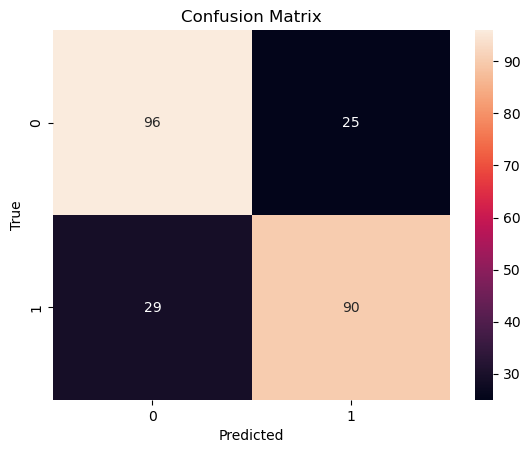

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [30]:
import scipy.sparse

# Save X_train as a .npz file
scipy.sparse.save_npz('X_train.npz', X_train)

# Save y_train as a CSV file
y_train.to_csv('y_train.csv', index=False)

from IPython.display import FileLink

# Create a link to download the training feature matrix
display(FileLink('X_train.npz'))

# Create a link to download the training target variable
display(FileLink('y_train.csv'))


/Users/konglingxiang/Desktop/code/cases/2024/20241209_spider/X_train.npz

/Users/konglingxiang/Desktop/code/cases/2024/20241209_spider/y_train.csv